In [1]:
import pandas as pd 

df=pd.read_csv('mnist.csv')

In [2]:
df.shape

(60000, 785)

In [3]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


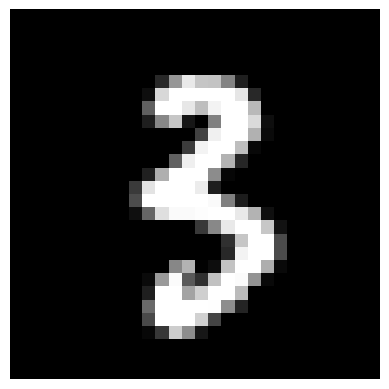

In [6]:
import matplotlib.pyplot as plt
img=df.iloc[45000,1:]

plt.imshow(img.values.reshape(28,28))
plt.gray()
plt.axis("off")
plt.show()

In [7]:
x=df.iloc[:,1:]
y=df.label

#scale inputs
x=x/255
#one hot encoding for outcome variable
y_encoded=pd.get_dummies(y)

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y_encoded,random_state=0)

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import livelossplot
from livelossplot import PlotLossesKerasTF
from tensorflow.keras.metrics import Precision,Recall

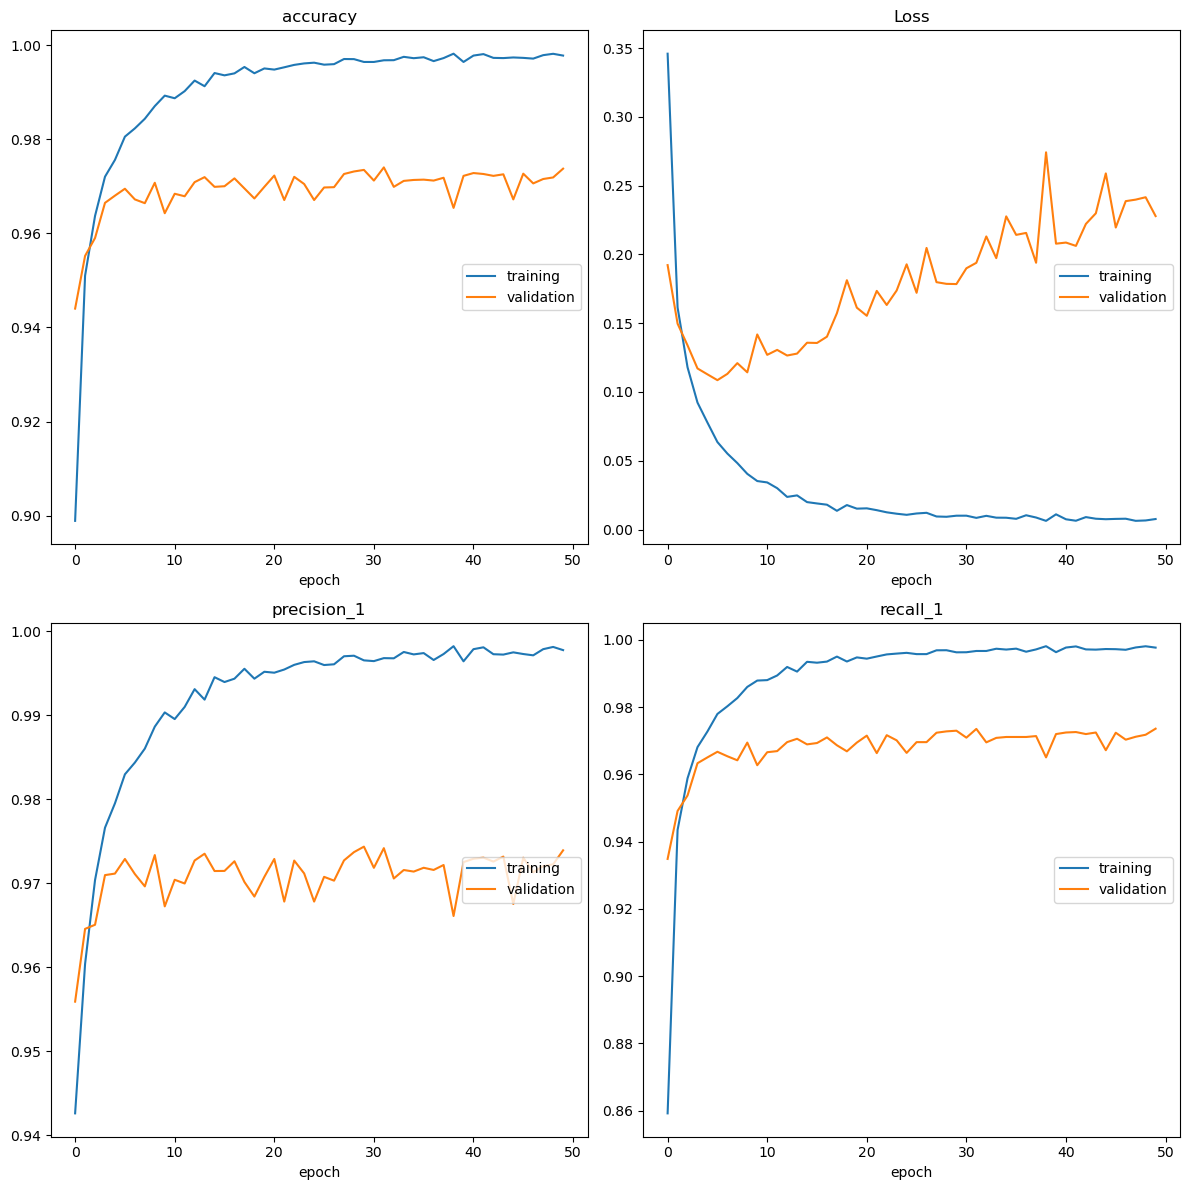

accuracy
	training         	 (min:    0.899, max:    0.998, cur:    0.998)
	validation       	 (min:    0.944, max:    0.974, cur:    0.974)
Loss
	training         	 (min:    0.006, max:    0.346, cur:    0.008)
	validation       	 (min:    0.109, max:    0.274, cur:    0.228)
precision_1
	training         	 (min:    0.943, max:    0.998, cur:    0.998)
	validation       	 (min:    0.956, max:    0.974, cur:    0.974)
recall_1
	training         	 (min:    0.859, max:    0.998, cur:    0.998)
	validation       	 (min:    0.935, max:    0.974, cur:    0.974)
1407/1407 [==============================] - 17s 12ms/step - loss: 0.0076 - accuracy: 0.9978 - precision_1: 0.9978 - recall_1: 0.9977 - val_loss: 0.2279 - val_accuracy: 0.9737 - val_precision_1: 0.9739 - val_recall_1: 0.9736


In [11]:
model=Sequential()
model.add(Dense(50,activation="relu"))#hl1
model.add(Dense(50,activation="relu"))#hl2
model.add(Dense(10,activation="softmax"))#output
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy",Precision(),Recall()])

model.fit(x_train,y_train,epochs=50,callbacks=[PlotLossesKerasTF()],validation_data=(x_test,y_test))


In [12]:
#prdict outcomes on test data 
test_pred=model.predict(x_test)

469/469 [==============================] - 3s 5ms/step


In [13]:
test_pred

array([[8.1487950e-37, 3.9310974e-24, 8.9901713e-24, ..., 4.1011154e-22,
        9.4307998e-14, 4.5504377e-17],
       [2.3996783e-32, 0.0000000e+00, 9.3986878e-30, ..., 0.0000000e+00,
        1.5959676e-29, 4.4825691e-34],
       [3.7147523e-17, 6.4678052e-22, 1.0443475e-11, ..., 3.4092986e-20,
        4.7948455e-18, 2.6770554e-13],
       ...,
       [3.8704437e-20, 2.7454067e-18, 1.7706930e-21, ..., 2.1682658e-06,
        6.1712907e-10, 9.9999726e-01],
       [1.7688588e-09, 7.2452879e-21, 2.0752639e-13, ..., 1.0000000e+00,
        1.5331161e-17, 4.8252038e-14],
       [4.6927367e-24, 2.3818789e-37, 1.0000000e+00, ..., 1.6316394e-16,
        6.1963291e-27, 3.7005590e-36]], dtype=float32)

In [14]:
y_test_pred=test_pred.argmax(axis=1)

In [15]:
pd.crosstab(y_test.idxmax(axis=1),y_test_pred)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,1492,0,3,0,4,1,3,2,3,2
1,0,1704,8,4,2,0,4,4,1,1
2,3,1,1422,2,6,2,3,8,8,3
3,0,0,17,1487,0,16,1,8,15,4
4,1,1,3,0,1402,0,1,4,2,20
5,8,0,4,12,3,1281,9,3,11,11
6,5,1,5,0,6,3,1445,0,3,0
7,0,2,17,3,5,1,1,1496,3,7
8,5,6,8,3,1,9,6,0,1442,4


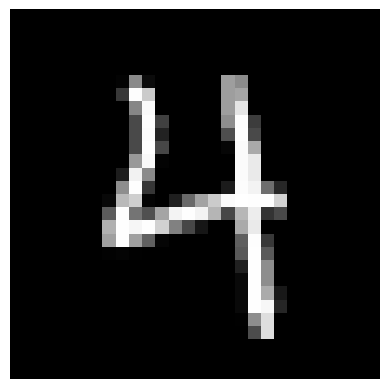

Actual Label:  4
Predicted Label:  4


In [16]:
ind=700
img=x_test.values[ind,:]

plt.imshow(img.reshape(28,28))
plt.gray()
plt.axis("off")
plt.show()
print("Actual Label: ",y_test.values.argmax(axis=1)[ind])
print("Predicted Label: ",y_test_pred[ind])

In [17]:
y_test.shape

(15000, 10)

In [18]:
#l2  regularizer
from tensorflow.keras.regularizers import L2

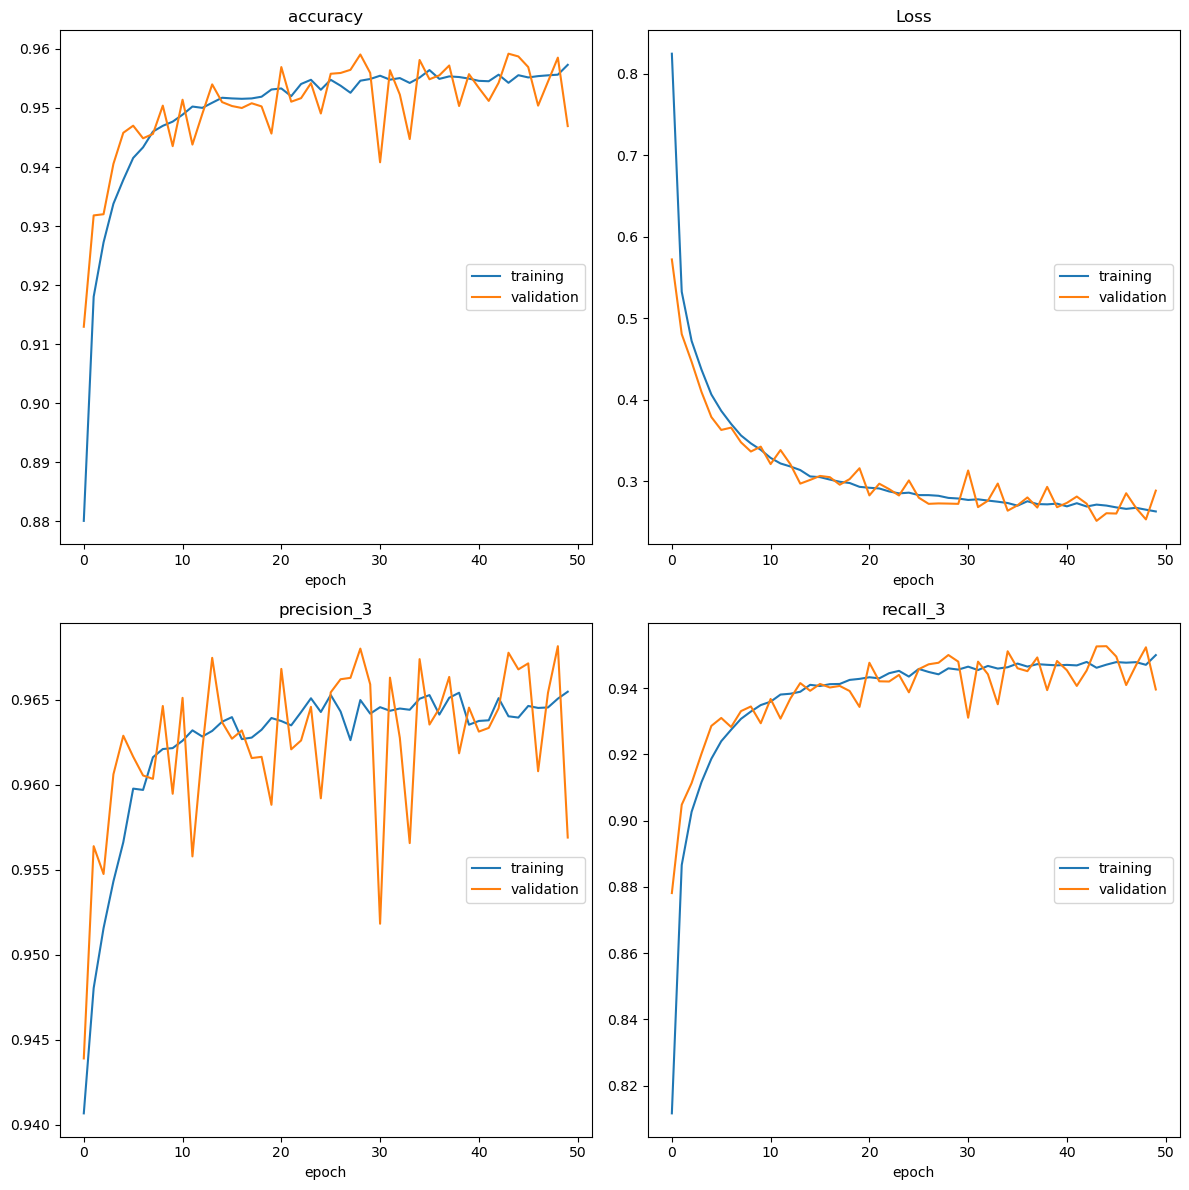

accuracy
	training         	 (min:    0.880, max:    0.957, cur:    0.957)
	validation       	 (min:    0.913, max:    0.959, cur:    0.947)
Loss
	training         	 (min:    0.263, max:    0.825, cur:    0.263)
	validation       	 (min:    0.251, max:    0.572, cur:    0.288)
precision_3
	training         	 (min:    0.941, max:    0.965, cur:    0.965)
	validation       	 (min:    0.944, max:    0.968, cur:    0.957)
recall_3
	training         	 (min:    0.812, max:    0.950, cur:    0.950)
	validation       	 (min:    0.878, max:    0.953, cur:    0.940)
1407/1407 [==============================] - 19s 14ms/step - loss: 0.2629 - accuracy: 0.9573 - precision_3: 0.9655 - recall_3: 0.9500 - val_loss: 0.2884 - val_accuracy: 0.9469 - val_precision_3: 0.9569 - val_recall_3: 0.9396


In [20]:
model=Sequential()
model.add(Dense(50,activation="relu",kernel_regularizer=L2(l2=0.01)))#h1
model.add(Dense(50,activation="relu",kernel_regularizer=L2(l2=0.01)))#h2
model.add(Dense(10,activation="softmax"))#output
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy",Precision(),Recall()])

model.fit(x_train,y_train,epochs=50,callbacks=[PlotLossesKerasTF()],validation_data=(x_test,y_test))

In [21]:
from tensorflow.keras.layers import Dropout

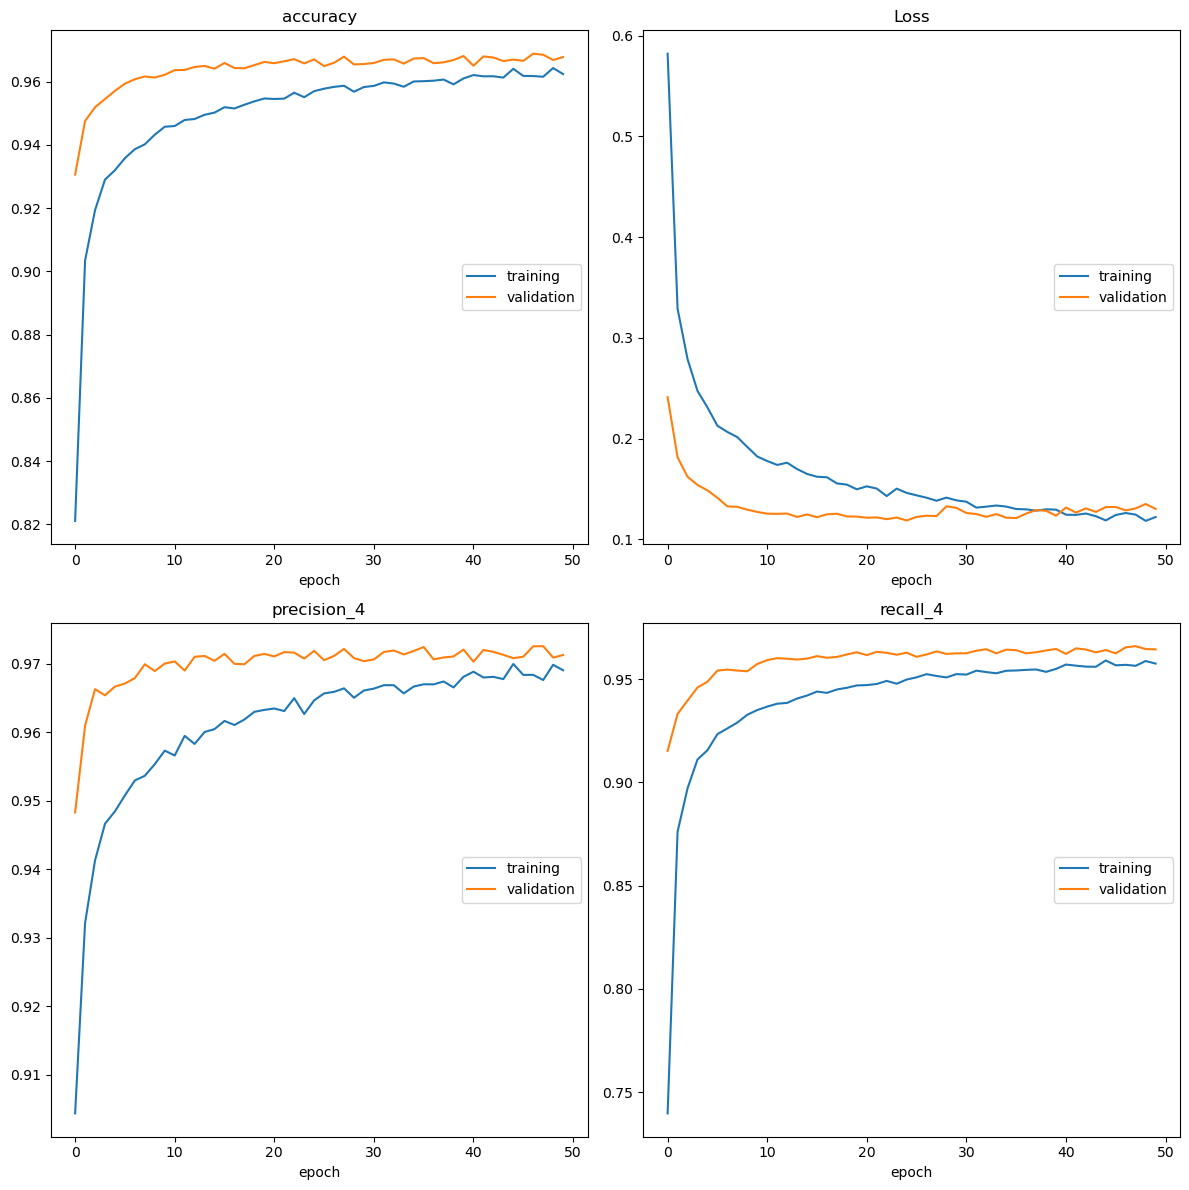

accuracy
	training         	 (min:    0.821, max:    0.964, cur:    0.962)
	validation       	 (min:    0.931, max:    0.969, cur:    0.968)
Loss
	training         	 (min:    0.118, max:    0.582, cur:    0.122)
	validation       	 (min:    0.119, max:    0.241, cur:    0.130)
precision_4
	training         	 (min:    0.904, max:    0.970, cur:    0.969)
	validation       	 (min:    0.948, max:    0.973, cur:    0.971)
recall_4
	training         	 (min:    0.740, max:    0.959, cur:    0.958)
	validation       	 (min:    0.915, max:    0.966, cur:    0.964)
1407/1407 [==============================] - 22s 16ms/step - loss: 0.1220 - accuracy: 0.9624 - precision_4: 0.9690 - recall_4: 0.9575 - val_loss: 0.1301 - val_accuracy: 0.9677 - val_precision_4: 0.9713 - val_recall_4: 0.9644


In [22]:
model=Sequential()
model.add(Dense(50,activation="relu"))#h1
model.add(Dropout(0.3)) # dropout layer
model.add(Dense(50,activation="relu"))#h2
model.add(Dropout(0.3)) # dropout layer
model.add(Dense(10,activation="softmax"))#output
model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=["accuracy",Precision(),Recall()])

model.fit(x_train,y_train,epochs=50,callbacks=[PlotLossesKerasTF()],validation_data=(x_test,y_test))